In [18]:
import pandas as pd 
import numpy as np 
import seaborn as sns 

from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import CategoricalNB

In [19]:
data = pd.read_csv('machine failure.csv')

In [20]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [21]:
lis = ['TWF','HDF','PWF','OSF','RNF','UDI','Product ID']
data.drop(columns=lis,inplace=True)

In [22]:
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


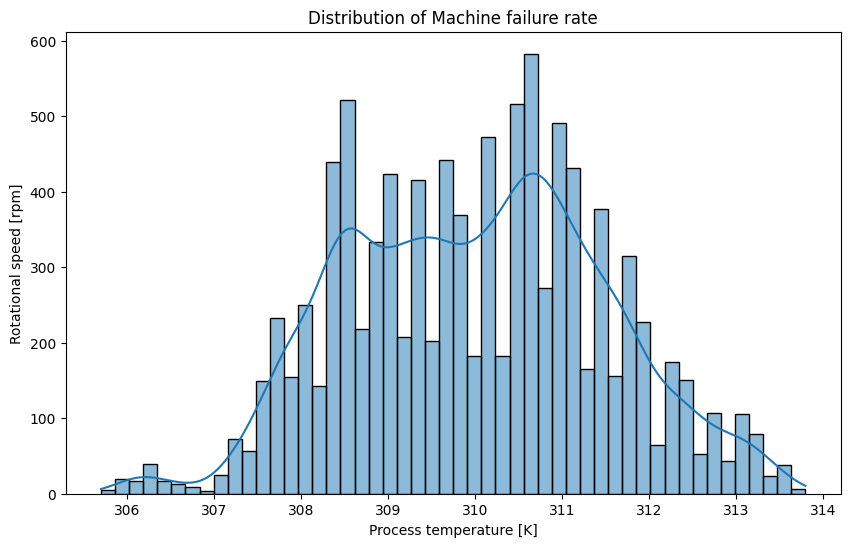

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Process temperature [K]'], bins=50, kde=True)
plt.title('Distribution of Machine failure rate')
plt.xlabel('Process temperature [K]')
plt.ylabel('Rotational speed [rpm]')
plt.show()

In [24]:
data['Tool wear [min]'].max()

253

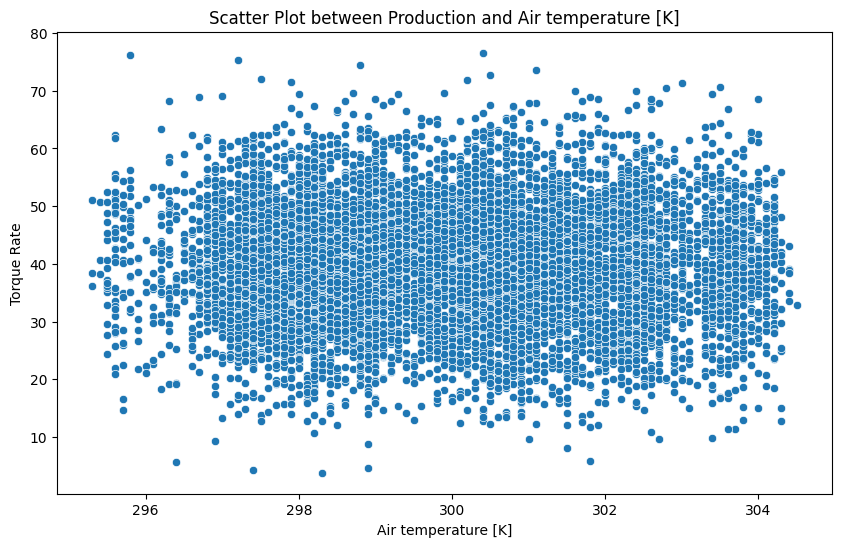

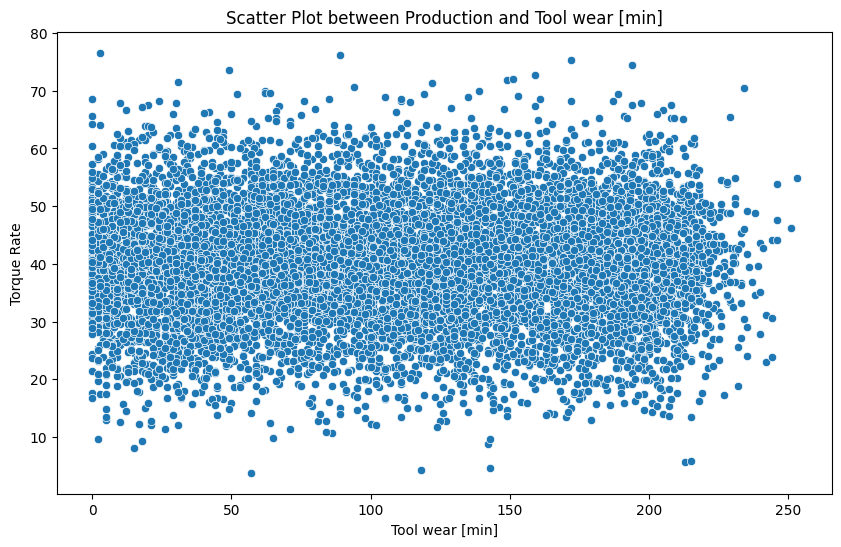

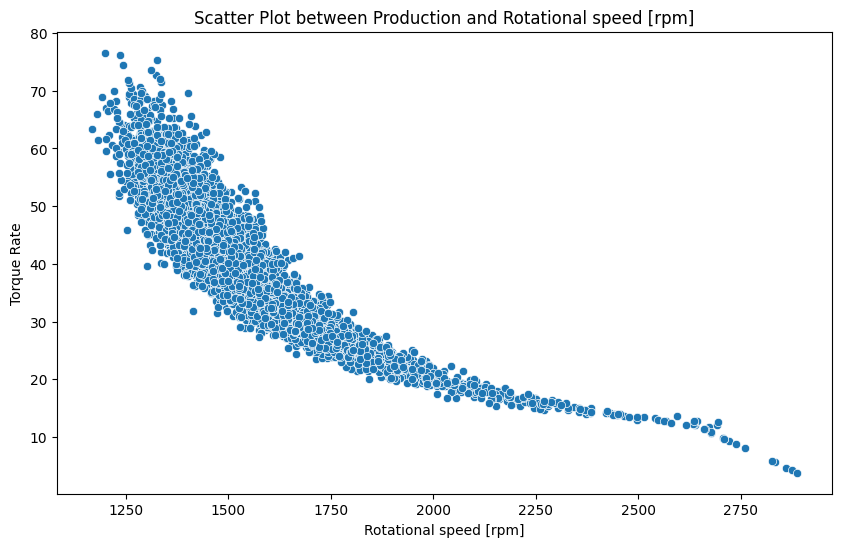

In [25]:
economic_factors = ['Air temperature [K]', 'Tool wear [min]', 'Rotational speed [rpm]']  # Replace with actual column names
for factor in economic_factors:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[factor], y=data['Torque [Nm]'])
    plt.title(f'Scatter Plot between Production and {factor}')
    plt.xlabel(factor)
    plt.ylabel('Torque Rate')
    plt.show()

In [26]:
bina = [295,300,305]
labela = ['Low','high']

data['Air temperature [K]'] = pd.cut(data['Air temperature [K]'], bins= bina, labels= labela)

In [27]:
bina = [305,310,315]
labela = ['Low','high']

data['Process temperature [K]'] = pd.cut(data['Process temperature [K]'], bins= bina, labels= labela)

In [28]:
bina = [1000,1650,2250,3000]
labela = ['Low','Medium','high']

data['Rotational speed [rpm]'] = pd.cut(data['Rotational speed [rpm]'], bins= bina, labels= labela)

In [29]:
bina = [0,30,60,80,]
labela = ['Low','Medium','high']

data['Torque [Nm]'] = pd.cut(data['Torque [Nm]'], bins= bina, labels= labela)

In [30]:
bina = [-1,50,100,150,200,255]
labela = ['Very Low','low','Medium','high','very high']

data['Tool wear [min]'] = pd.cut(data['Tool wear [min]'], bins= bina, labels= labela)

In [31]:
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,Low,Low,Low,Medium,Very Low,0
1,L,Low,Low,Low,Medium,Very Low,0
2,L,Low,Low,Low,Medium,Very Low,0
3,L,Low,Low,Low,Medium,Very Low,0
4,L,Low,Low,Low,Medium,Very Low,0


In [32]:
label_encoder = {
'Type' : LabelEncoder(),	
'Air temperature [K]'	: LabelEncoder(),	
'Process temperature [K]' : LabelEncoder(),
'Rotational speed [rpm]' : LabelEncoder(),	
'Torque [Nm]': LabelEncoder(),	
'Tool wear [min]' : LabelEncoder(),
'Machine failure' : LabelEncoder(),	    
}
for column, encoder in label_encoder.items():
    data[column] = encoder.fit_transform(data[column])
    
    


In [33]:
target_encoder = LabelEncoder()

In [34]:
data['Machine failure'] = target_encoder.fit_transform(data['Machine failure'])

In [35]:
import pickle

In [36]:
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,2,0,0,0,1,1,0
1,1,0,0,0,1,1,0
2,1,0,0,0,1,1,0
3,1,0,0,0,1,1,0
4,1,0,0,0,1,1,0


In [37]:
data.isnull().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
dtype: int64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Type                     10000 non-null  int32
 1   Air temperature [K]      10000 non-null  int32
 2   Process temperature [K]  10000 non-null  int32
 3   Rotational speed [rpm]   10000 non-null  int32
 4   Torque [Nm]              10000 non-null  int32
 5   Tool wear [min]          10000 non-null  int32
 6   Machine failure          10000 non-null  int64
dtypes: int32(6), int64(1)
memory usage: 312.6 KB


In [39]:
X = data.drop(columns='Machine failure')
y = data['Machine failure']

In [40]:
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.3,random_state=42)

In [41]:
model = CategoricalNB()
model.fit(X_train,y_train)

CategoricalNB()

In [42]:
with open('Machine_failure.pkl', 'wb') as file:
    pickle.dump((model, label_encoder, target_encoder),file)

In [43]:
y_pred = model.predict(X_test)

In [44]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [45]:
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[2900   86]
 [   7    7]]


In [46]:
model.score(X_test,y_test)

0.969

In [47]:
ac = accuracy_score(y_pred,y_test)
print(ac)

0.969


In [48]:
cl = classification_report(y_pred,y_test)
print(cl)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2986
           1       0.08      0.50      0.13        14

    accuracy                           0.97      3000
   macro avg       0.54      0.74      0.56      3000
weighted avg       0.99      0.97      0.98      3000



<Axes: >

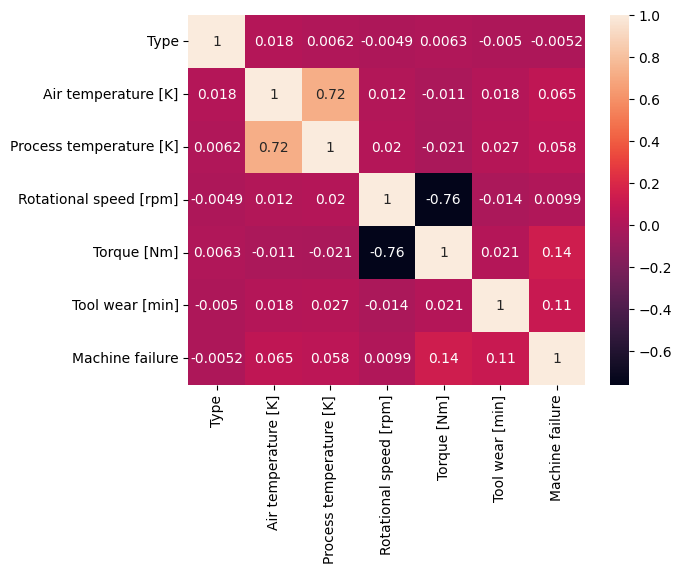

In [49]:
sns.heatmap(data.corr(),annot=True)

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
print(cross_val_score(model, X_test, y_test , cv=3))

[0.967 0.97  0.971]


<Axes: >

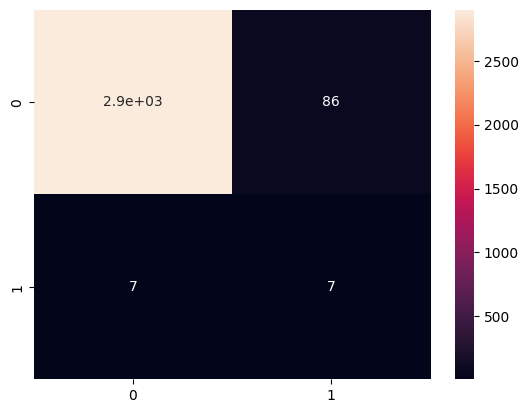

In [52]:
sns.heatmap(data= cm,annot=True)

c:\Users\Aryan Mejari\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


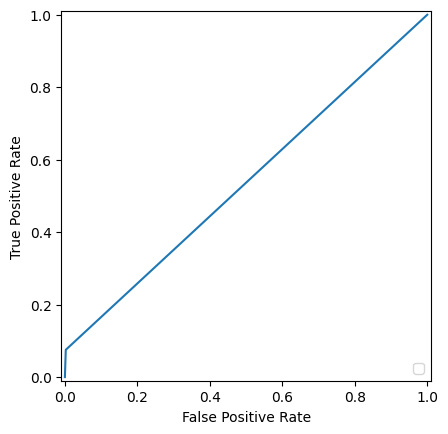

In [53]:
from sklearn.metrics import roc_curve,RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Hyperparameter Tuning (example for Random Forest)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_

# Model Training
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} model trained.')

# Training the best model from Grid Search
best_rf_model.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Decision Tree model trained.
Random Forest model trained.
Gradient Boosting model trained.


RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=200)

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Define a function to evaluate model performance
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Model: {model}')
    print(f'MAE (Train): {mean_absolute_error(y_train, y_train_pred)}')
    print(f'MAE (Test): {mean_absolute_error(y_test, y_test_pred)}')
    print(f'MSE (Train): {mean_squared_error(y_train, y_train_pred)}')
    print(f'MSE (Test): {mean_squared_error(y_test, y_test_pred)}')
    print(f'R² (Train): {r2_score(y_train, y_train_pred)}')
    print(f'R² (Test): {r2_score(y_test, y_test_pred)}')
    print('Cross-Validation Scores:', cross_val_score(model, X_train, y_train, cv=5))
    print('')

# Evaluate each model
for name, model in models.items():
    evaluate_model(model, X_train, X_test, y_train, y_test)

# Evaluate the best Random Forest model
evaluate_model(best_rf_model, X_train, X_test, y_train, y_test)

# Feature Importance Analysis
importances = best_rf_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)




Model: DecisionTreeRegressor()
MAE (Train): 0.04876890332607379
MAE (Test): 0.048749622835352134
MSE (Train): 0.024384451663036894
MSE (Test): 0.025562241469374438
R² (Train): 0.2808608861181884
R² (Test): 0.1490315433478332
Cross-Validation Scores: [0.14091343 0.25998954 0.07435246 0.0450527  0.16279929]

Model: RandomForestRegressor()
MAE (Train): 0.04955405644031806
MAE (Test): 0.04842594734926513
MSE (Train): 0.024524027874120776
MSE (Test): 0.024363506630125965
R² (Train): 0.27674454533903536
R² (Test): 0.1889374935874707
Cross-Validation Scores: [0.16443288 0.25140651 0.11564608 0.07451584 0.18656627]

Model: GradientBoostingRegressor()
MAE (Train): 0.054141883224294474
MAE (Test): 0.05129207404398557
MSE (Train): 0.026099370442155777
MSE (Test): 0.02347194110253575
R² (Train): 0.23028500324671608
R² (Test): 0.21861776016059942
Cross-Validation Scores: [0.18631646 0.24230104 0.16156203 0.15512855 0.20265493]

Model: RandomForestRegressor(max_depth=10, min_samples_split=5, n_estim